# use UMAP for data visualization

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation. The algorithm is founded on three assumptions about the data:

- The data is uniformly distributed on a Riemannian manifold;
- The Riemannian metric is locally constant (or can be approximated as such);
- The manifold is locally connected.

From these assumptions it is possible to model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.

In [5]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import umap
%matplotlib inline

## read the data

In [6]:
#reading features or annotations from CSV file
df1 = pd.read_csv('your path/yourfile.csv')   #your path
df = df.dropna()

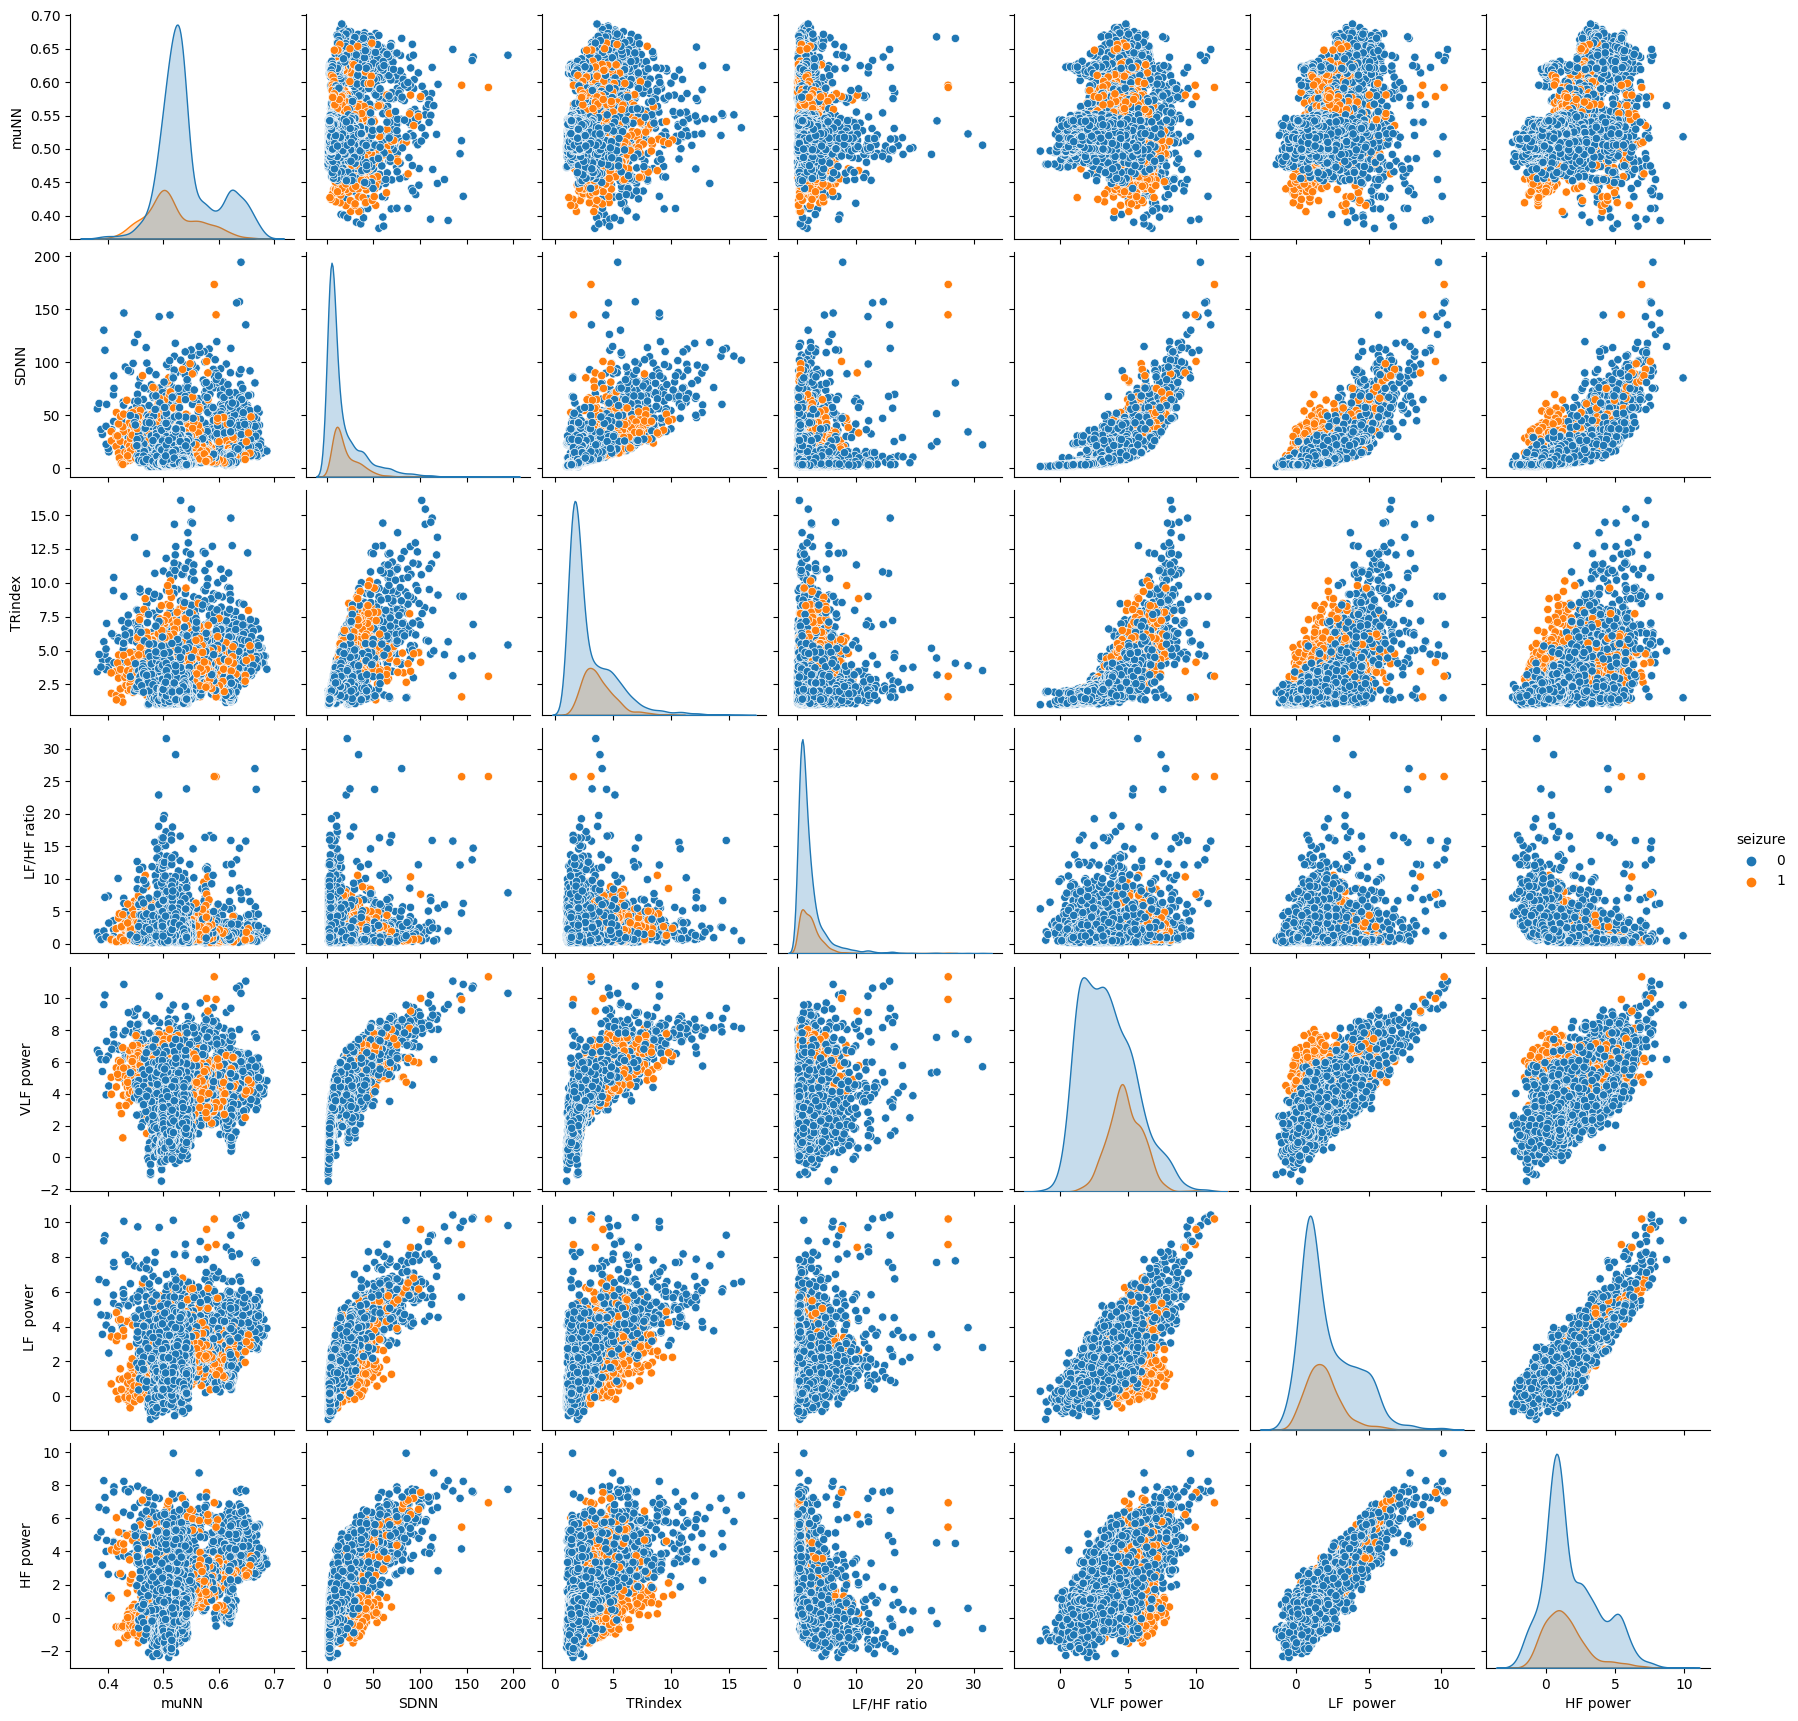

In [7]:
#plot features as pair for comparison and visualization
sns.pairplot(df, hue='seizure')
plt.savefig(f'your path/pairplot.png')

## reduce data demention

In [8]:
#Standardize features by removing the mean and scaling to unit variance
df_data = df[['muNN','SDNN','TRindex','LF/HF ratio','VLF power','LF  power','HF power']].values   #select only features of dataframe
scaled_data = StandardScaler().fit_transform(df_data)

In [9]:
#define UMAP function to reduce the data dimention
def fit_params(my_data, n_neighbors, min_dist, metric):
    fit = umap.UMAP(n_components=3, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric)    #n_components=3 means dimention is 3 
    reduced_data = fit.fit_transform(my_data) 
    return reduced_data

## UMAP Parameters
- **n_neighbors** controls how UMAP balances local versus global structure in the data. This means that low values of n_neighbors will force UMAP to concentrate on very local structure , while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader of the data. 

- **min_dist** controls how tightly UMAP is allowed to pack points together. This means that low values of min_dist will result in clumpier embeddings. Larger values of min_dist will prevent UMAP from packing points together and will focus on the preservation of the broad topological structure instead.

- **metric** controls how distance is computed in the ambient space of the input data. 


In [10]:
#different parameters for UMAP function
n_neighbors = [3, 20, 100]
min_dist = [0.2, 0.6, 0.99]
metric = ['euclidean', 'correlation']

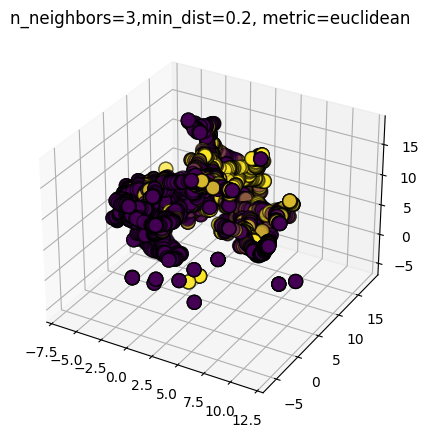

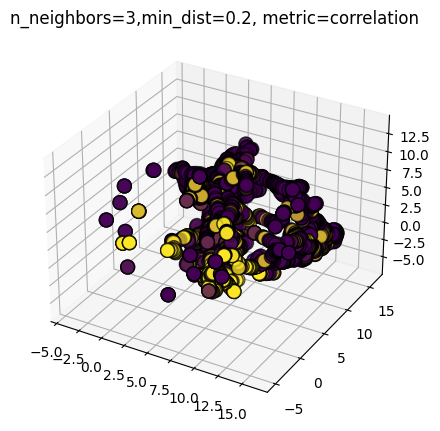

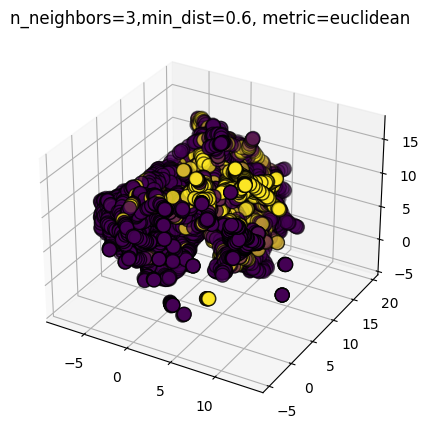

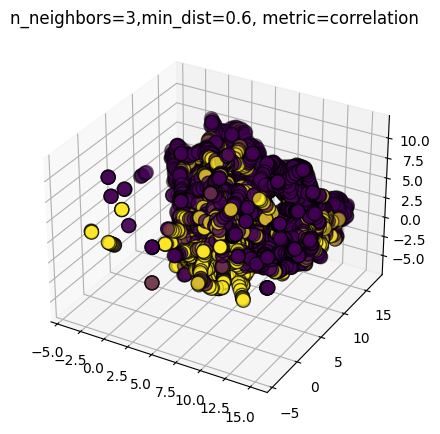

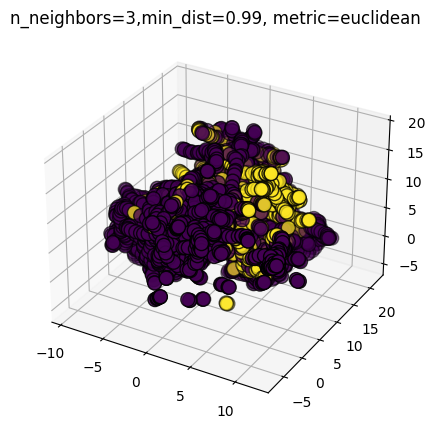

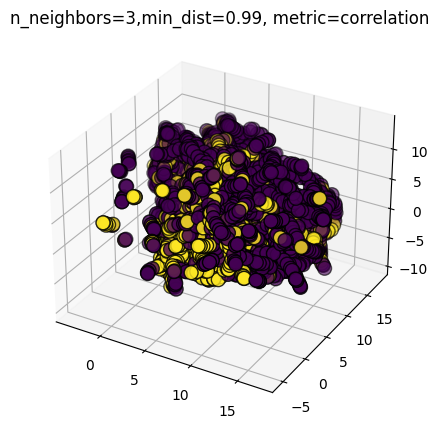

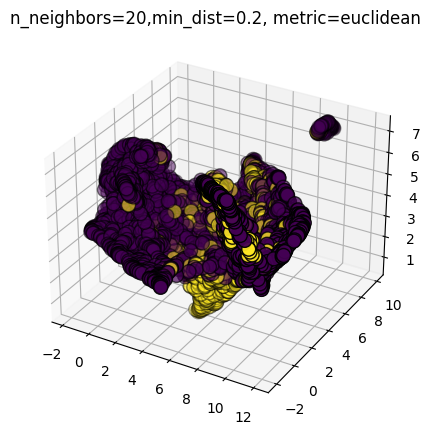

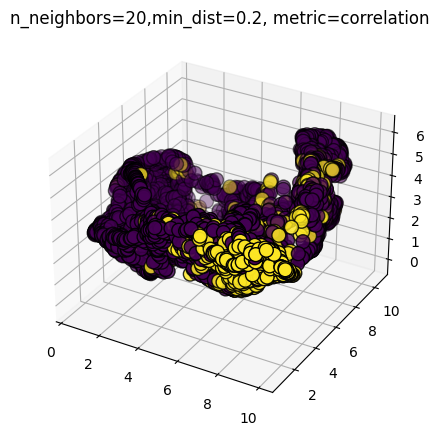

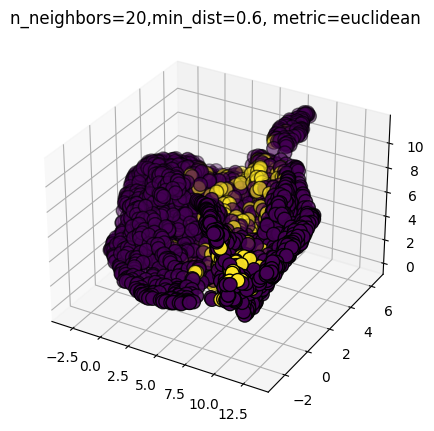

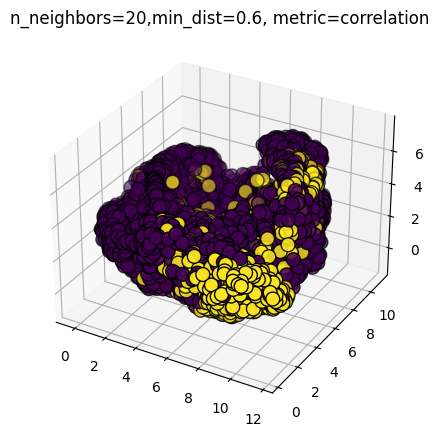

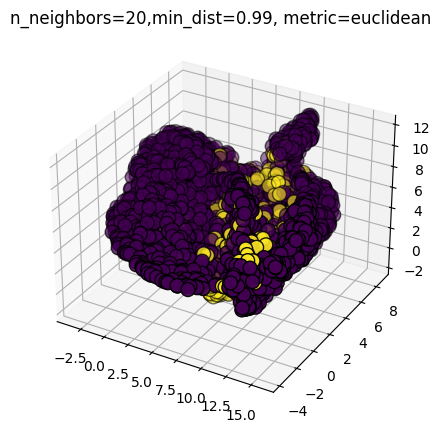

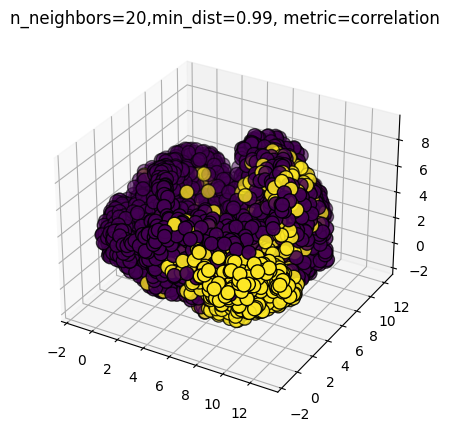

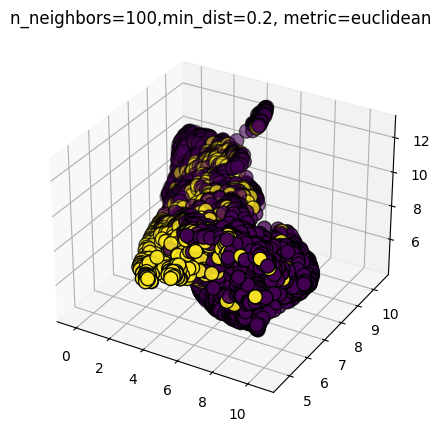

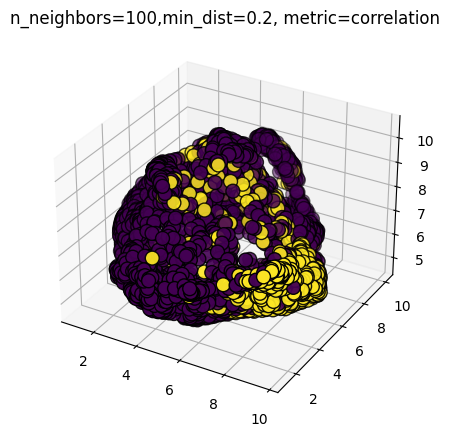

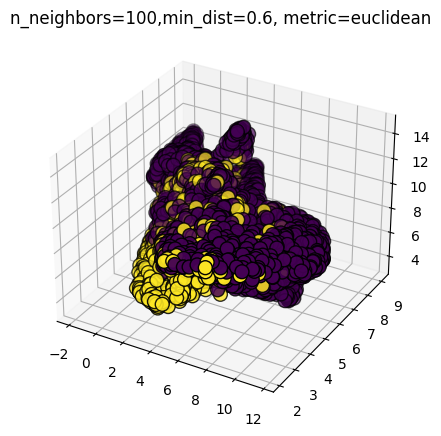

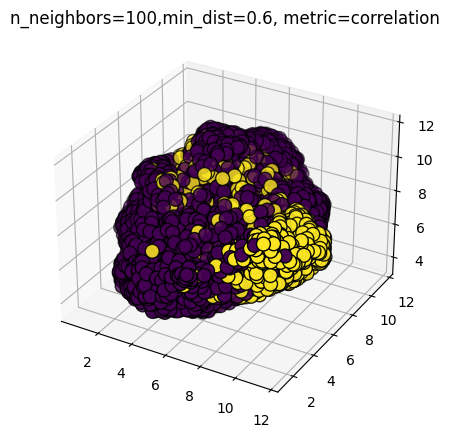

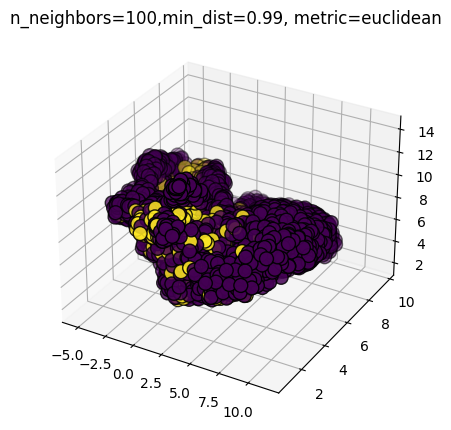

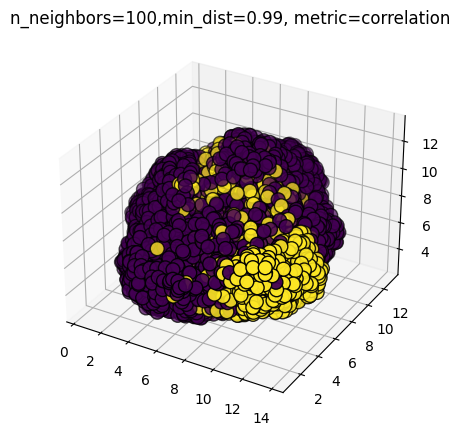

In [11]:
#use all parameters and get different umap results and plots
for i in n_neighbors:
    for j in min_dist:
        for m in metric:
            embedding = fit_params(scaled_data, i, j, m)
            #plot the data(UMAP projection of the dataset)
            plt.figure(figsize=(6, 5))
            ax = plt.axes(projection='3d')
            img = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=df.seizure, edgecolor="k",s=100)
            ax.set_title(f'n_neighbors={i},min_dist={j}, metric={m}');
            plt.savefig(f'your path/image{i}{j}{m}.png')
